<a href="https://colab.research.google.com/github/haingocnguyen/Used-Car-Price-Prediction/blob/main/%5BStat_Project%5D_Car_Price_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**


## **Library & data import**

In [ ]:
# To handle the data
import pandas as pd
import numpy as np

# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess the data
from sklearn.preprocessing import RobustScaler

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## **Explore the Dataset**

In [ ]:
df.shape
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset has 205 rows and 26 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


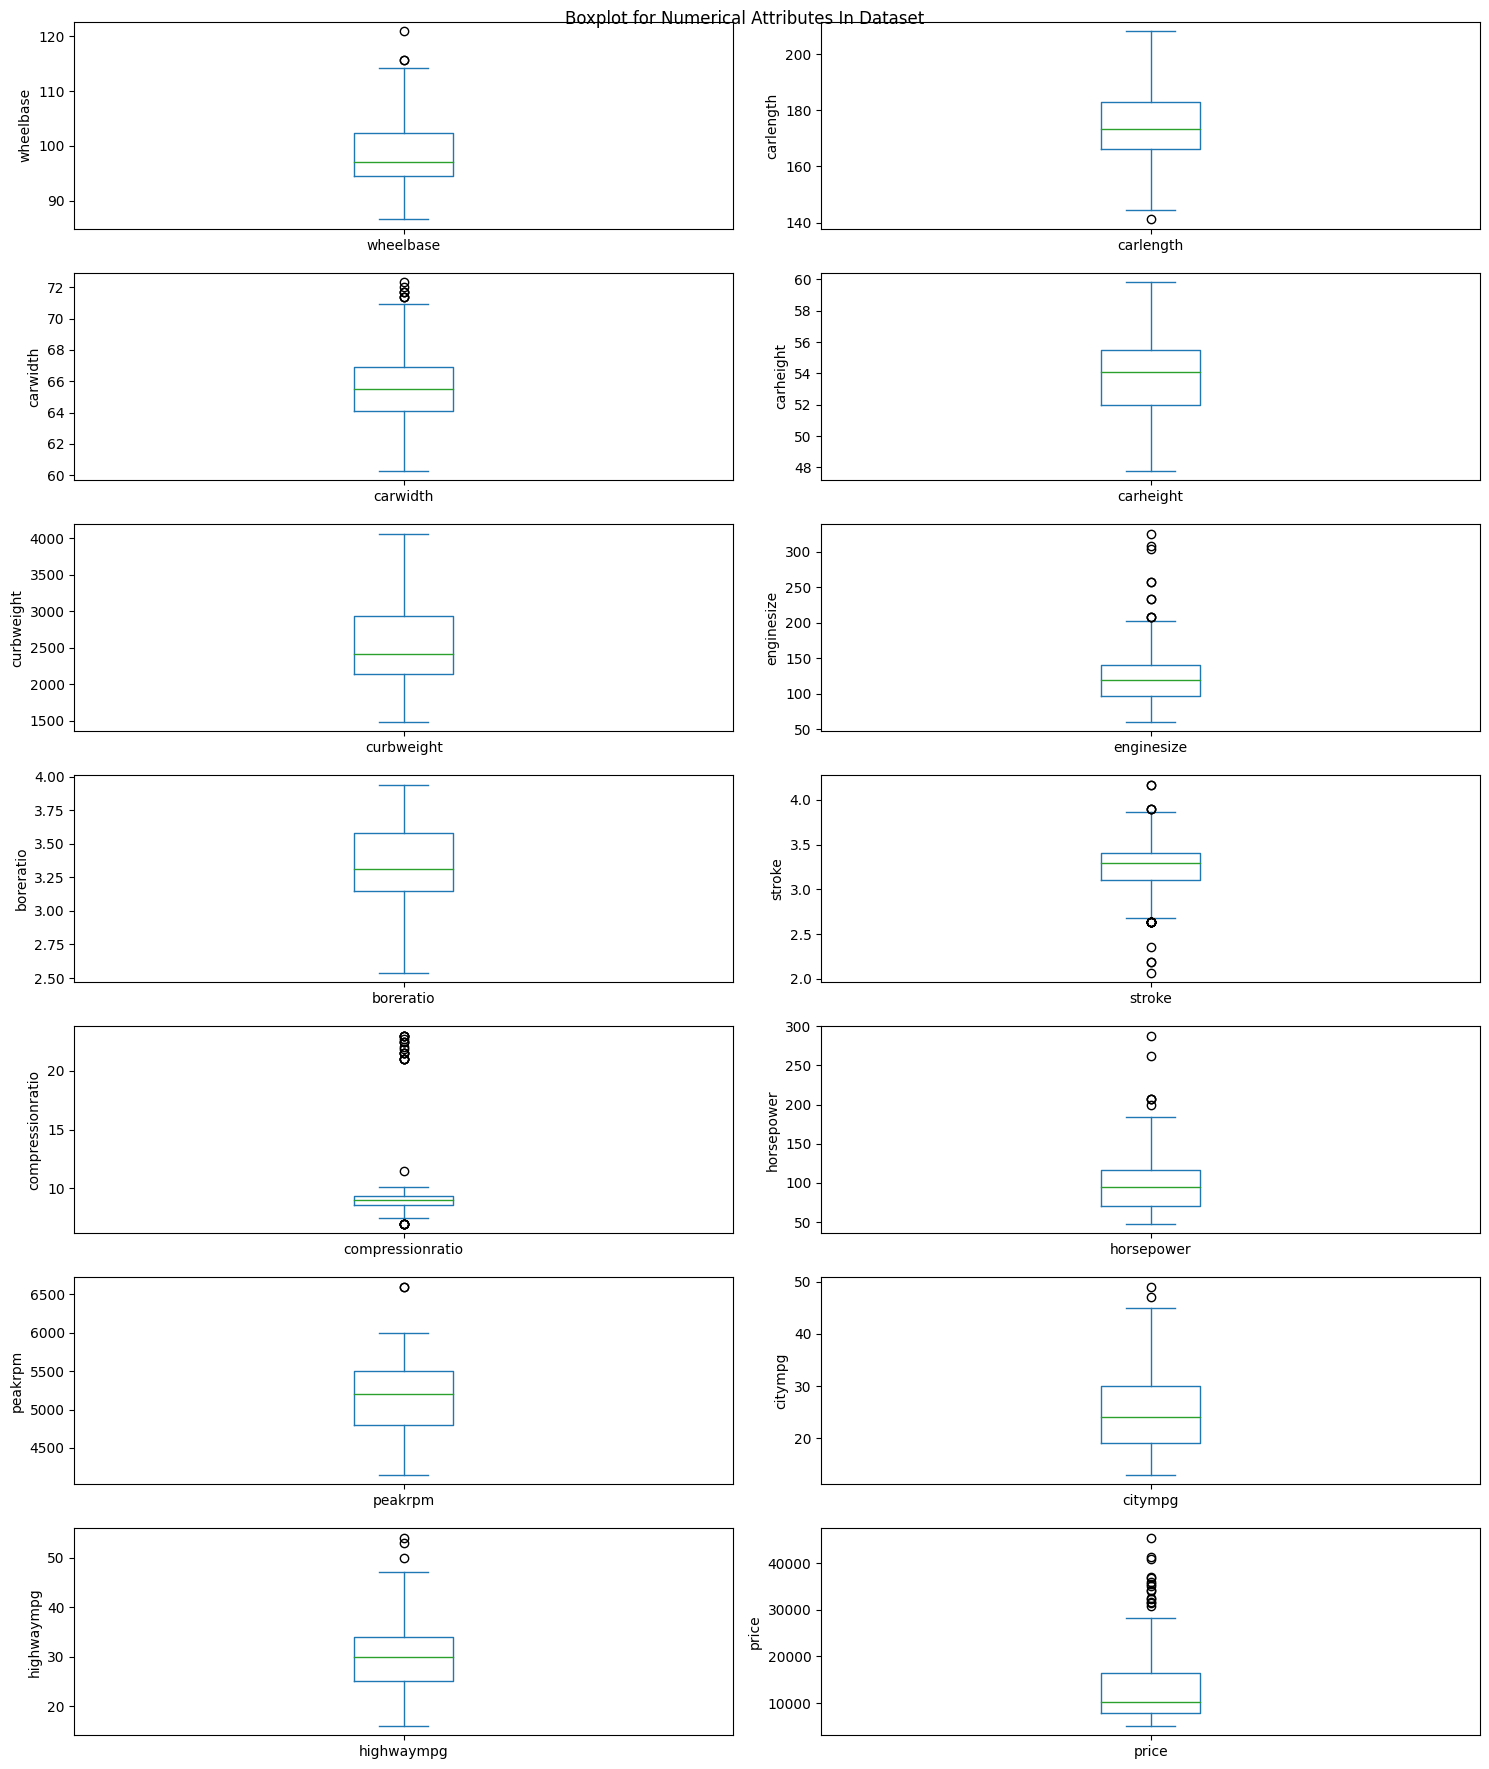

In [ ]:
# Specify the column names of the attributes you want to include
specific_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Create subplots for specific columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 18))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(specific_cols):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x')

# Hide empty subplots
for j in range(len(specific_cols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Boxplot for Numerical Attributes In Dataset')
plt.tight_layout()
plt.show()


## **Visualization**

In [ ]:
# List of object attributes excluding 'CarName'
object_attributes = [
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

# Convert categorical attributes to dummy variables
df_dummies = pd.get_dummies(df, columns=object_attributes)

df_dummies

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_dummies['price1'] = df['price']

Text(0.5, 1.0, 'Correlation Heatmap')

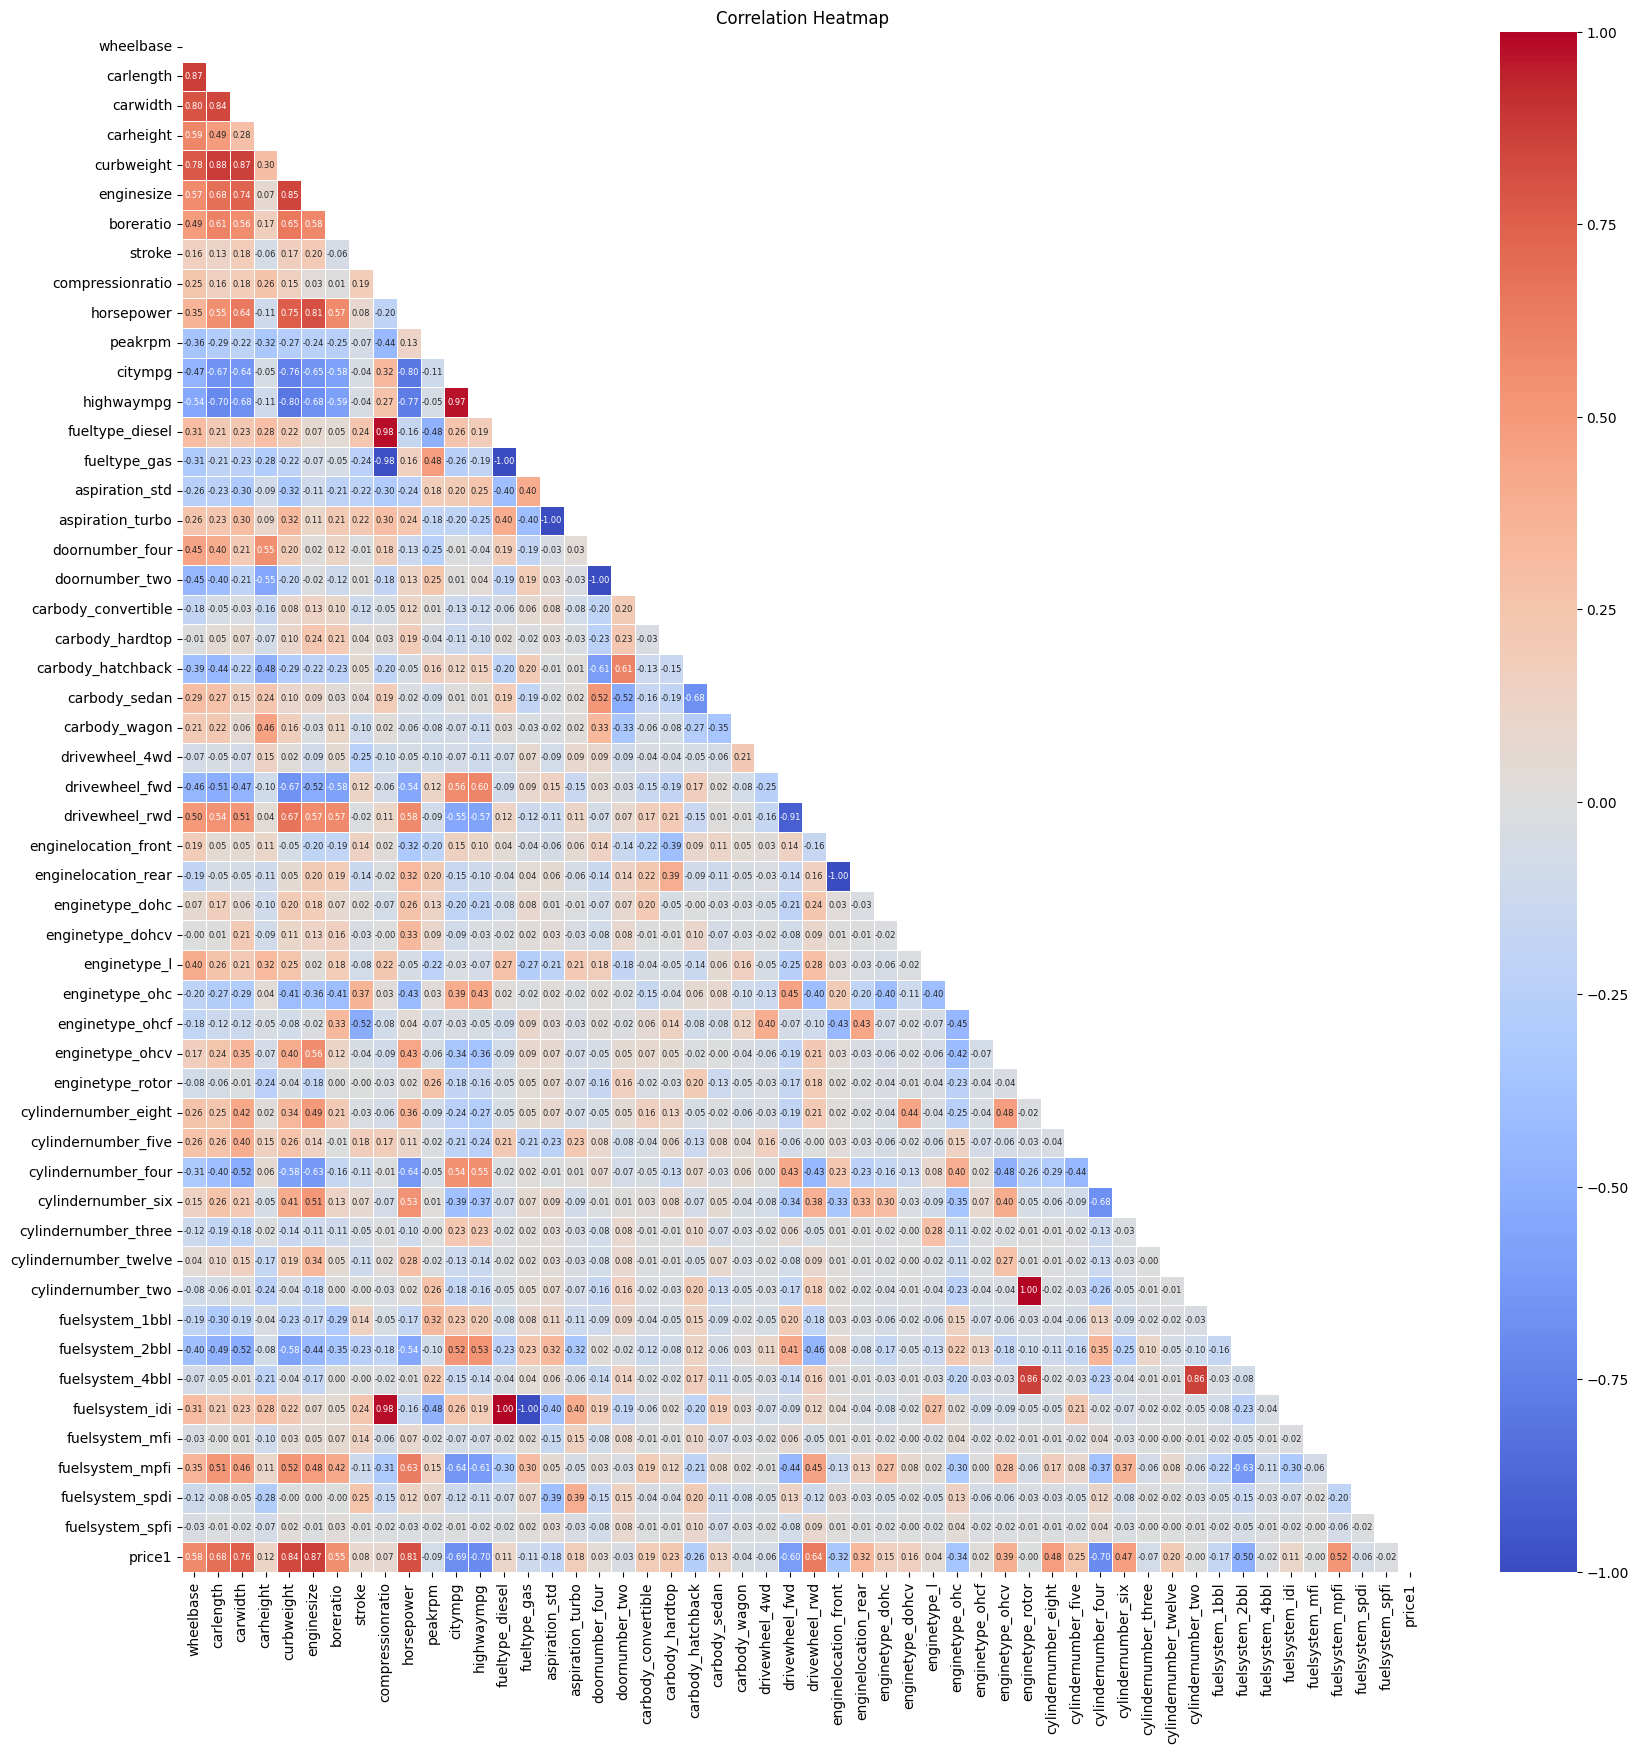

In [ ]:
# Create histogram using Seaborn
corr_matrix = df_dummies.drop(columns = ["CarName", "car_ID", "symboling", "price"]).corr()

plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 6})

plt.title('Correlation Heatmap')

In [ ]:
df_graph = df_dummies.copy()
df_graph

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price1
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,True,False,False,13495.0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,True,False,False,16500.0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,True,False,False,16500.0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,True,False,False,13950.0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,True,False,False,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,...,False,False,False,False,False,False,True,False,False,16845.0
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,...,False,False,False,False,False,False,True,False,False,19045.0
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,...,False,False,False,False,False,False,True,False,False,21485.0
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,...,False,False,False,False,True,False,False,False,False,22470.0


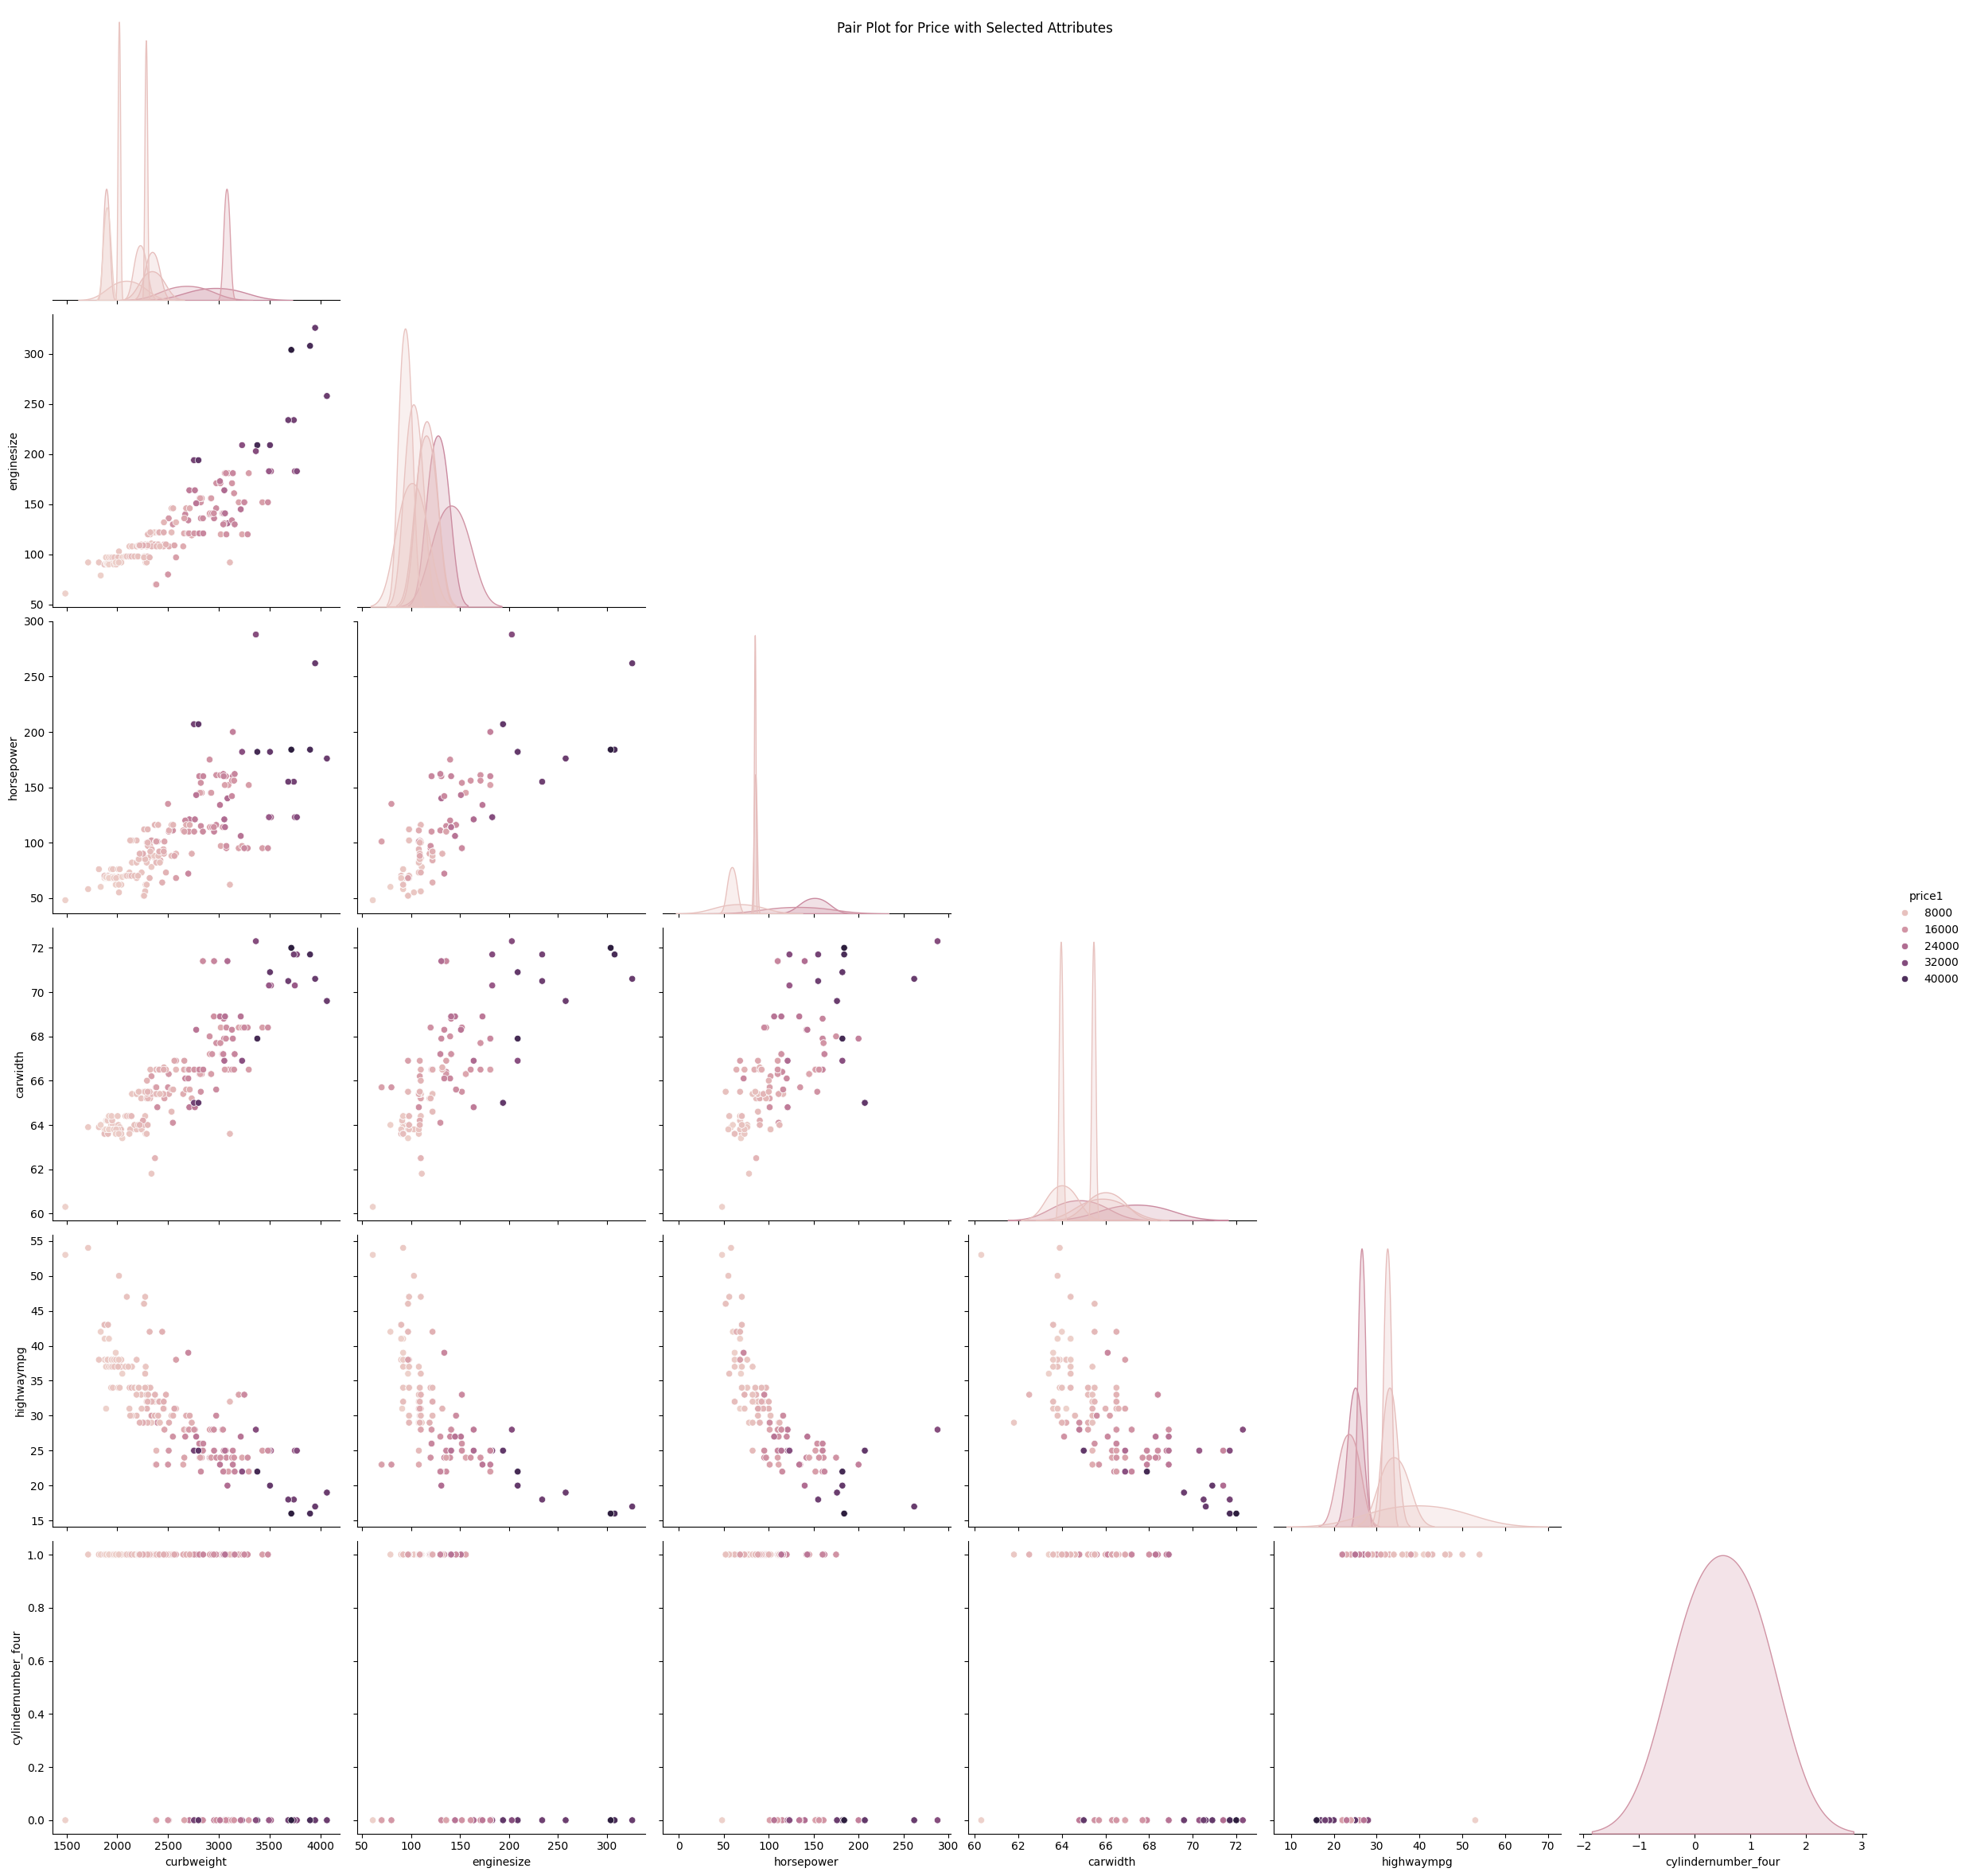

In [ ]:
import seaborn as sns
# Specify the attributes you want to include
attributes = ['curbweight', 'enginesize', 'horsepower', 'carwidth', 'highwaympg', 'cylindernumber_four']


# Create pair plot with 'price1' as hue
sns.pairplot(df_dummies, vars=attributes, hue='price1', diag_kind='kde', height=4, aspect = 1, corner=True)
plt.suptitle('Pair Plot for Price with Selected Attributes')
plt.show()


## **Result**  

* There are 205 non-null values in all the attributes thus no missing values.

* No duplicated rows.
  
* There are many outliers existed in the dataset, such as: 'car_width', 'enginesize', 'stroke', 'compressionratio' and 'price'.

* Datatype is also either 'float64' or 'int64' or 'object, all works well.

* Attributes with high correlation (|r|>0.7):  *'curbweight', 'enginesize', 'horsepower', 'carwidth', 'highwaympg', 'cylindernumber_four'*



## **Solution**

### **Scaling Data**


Dataset contains many outliers, so we decide to use Robust Scaler to scale data.

In [ ]:
'''
# Columns to scale
columns_to_scale = ['curbweight', 'enginesize', 'horsepower', 'carwidth', 'highwaympg', 'cylindernumber_four']
# Select the columns to be scaled
df_to_scale = df_dummies[columns_to_scale]
s
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the selected data and transform it
scaled_data = scaler.fit_transform(df_to_scale)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the rest of the DataFrame
df_scaled = pd.concat([df_scaled, df.drop(columns=columns_to_scale)], axis=1)
df1 = df_scaled
df1
'''